# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>


## Exercise 11.2

The second test was made on the **polynomial function**
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

This time I tried varying the following parameters:
1. the structure of the network: the **number of layers** and the **number of neurons** in each layer
2. the **activation function**
3. the **optimizer**
4. the **loss function**

and then I studied how the model behaved outside the interval in which it was trained.

while I kept $N_{train}=2000$, $N_{epoch}=30$, $\sigma=0.5$, which I already studied in the previous exercise.



In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

np.random.seed(0)

In [2]:
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3 
c = -2
d = 3

#f(x) definition
def f(x) :
    return a + b*x + c*(x**2) + d*(x**3)


In [6]:
#Data
np.random.seed(0)
sigma = 0.5 #Gaussian noise
x_train = np.random.uniform(-1, 1, 2000)
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function
y_valid = np.random.normal(f(x_valid), sigma)

#### 1.Structure of the network

First, I decided to find the smallest network which could perform an acceptable fit: after some trials I found out that it depends a lot on the activation function: using *relu* I could create an acceptable NN with 9 neurons, with structure [5, 3, 1].

In [7]:
#Declaring things

model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(1,), activation="relu"))
model.add(Dense(3, activation="relu"))#
model.add(Dense(1, ))#activation="selu"
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

#training
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 [==============================] - 1s 4ms/step - loss: 4.6205 - mse: 4.6205 - val_loss: 1.0676 - val_mse: 1.0676
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 0.9221 - mse: 0.9221 - val_loss: 0.6979 - val_mse: 0.6979
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 0.6517 - mse: 0.6517 - val_loss: 0.5569 - val_mse: 0.5569


PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.273159384727478
Test accuracy: 0.273159384727478
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.00853081326931715
Test accuracy: 0.00853081326931715


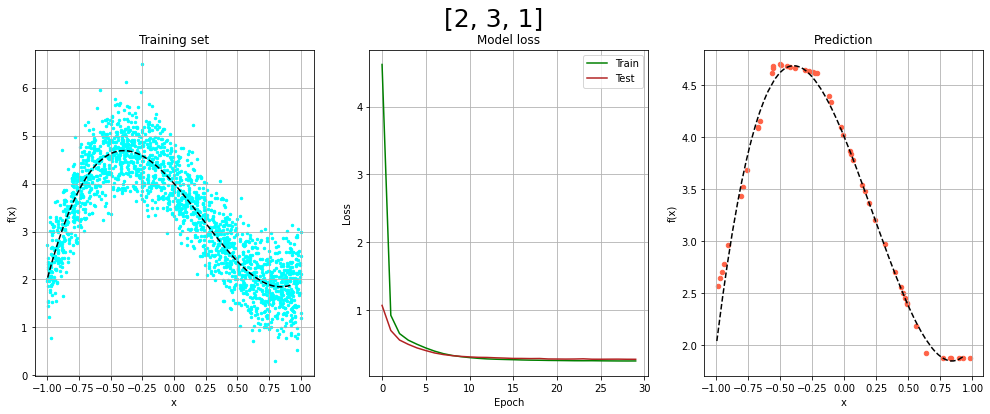

In [8]:
#Showing some results


print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig = plt.figure (figsize = (17, 6))
plt.suptitle ("[2, 3, 1]", fontsize=25)

plt.subplot (1, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=6)
plt.grid(True)
plt.title ("Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (1, 3, 2)
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="firebrick")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (1, 3, 3)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.show()




Then I decided to mai[testo del link](https:// [testo del link](https://))ntain only one hidden layer but increase the number of neurons in the first two layers: below I reported the configuration [20, 20, 1], which I observed it gives good results, and after that point increasing the number of neurons does't bring to appreciable improvements.

In [9]:

model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation="relu"))#
model.add(Dense(20, activation="relu"))#
model.add(Dense(1, ))#activation="selu"
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

#training
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 [==============================] - 0s 3ms/step - loss: 2.0957 - mse: 2.0957 - val_loss: 0.6948 - val_mse: 0.6948
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 0.6691 - mse: 0.6691 - val_loss: 0.5787 - val_mse: 0.5787
Epoch 3/30
63/63 [==============================] - 0s 1ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.4909 - val_mse: 0.4

PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2739278972148895
Test accuracy: 0.2739278972148895
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.014989929273724556
Test accuracy: 0.014989929273724556


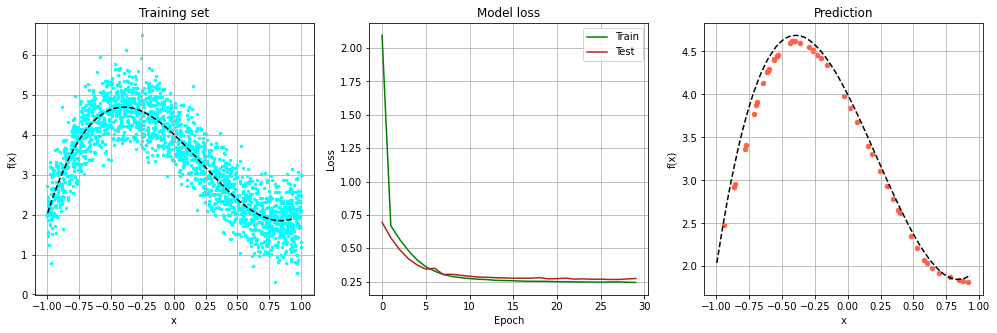

In [10]:
#Showing some results


print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig = plt.figure (figsize = (17, 5))
#plt.suptitle ("2, 3, 1", fontsize=25)

plt.subplot (1, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=6)
plt.grid(True)
plt.title ("Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (1, 3, 2)
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="firebrick")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (1, 3, 3)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.show()




After that I tried increase the number of hidden layers but maintain every layer with less than 6 neurons: below I reported the configuration [5, 4, 4, 3, 4, 1], which is one of the best I found, although I noticed the goodness of the fit depends a lot on the seed of the random numbers generator.

In [25]:

model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(1,), activation="relu"))#
model.add(Dense(4, activation="relu"))#
model.add(Dense(4, activation="relu"))#
model.add(Dense(3, activation="relu"))#
model.add(Dense(2, activation="relu"))#
model.add(Dense(1, ))#activation="selu"
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

#training
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 3         
Total params: 80
Trainable params: 80
Non-trainable params: 0
__________________________________________________________

PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2820098102092743
Test accuracy: 0.2820098102092743
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.012039031833410263
Test accuracy: 0.012039031833410263


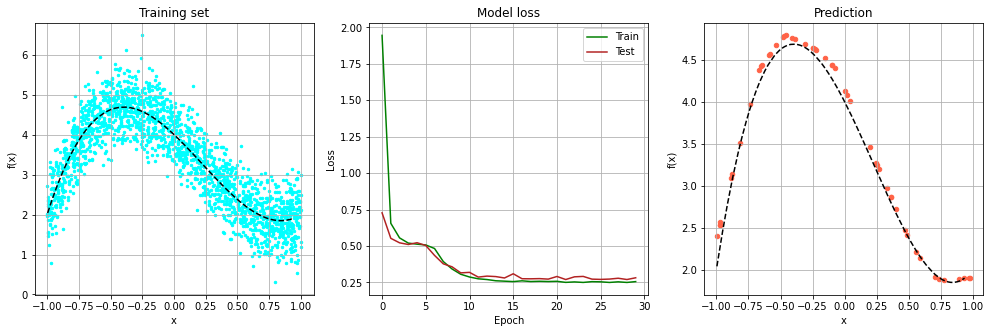

In [26]:
#Showing some results


print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig = plt.figure (figsize = (17, 5))
#plt.suptitle ("2, 3, 1", fontsize=25)

plt.subplot (1, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=6)
plt.grid(True)
plt.title ("Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (1, 3, 2)
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="firebrick")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (1, 3, 3)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.show()

Then I decided to rearrange four layers (one with 200 neurons, one with 100 neurons and two with 50 neurons) to see which configuration gives better results, among the **"triangle"** one ([200, 100, 50, 50, 1]), the **"round"** one ([50, 200, 100, 50, 1]) or the **"zigzag"** one ([200, 50, 100, 50, 1]).

In [ ]:

#Triangle
modelT = tf.keras.Sequential()
modelT.add(Dense(200, input_shape=(1,), activation="relu"))#
modelT.add(Dense(100, activation="relu"))#
modelT.add(Dense(50, activation="relu"))#
modelT.add(Dense(50, activation="relu"))#
modelT.add(Dense(1, ))#activation="selu"
modelT.compile(optimizer='sgd', loss='mse', metrics=['mse'])
modelT.summary()

#Round
modelR = tf.keras.Sequential()
modelR.add(Dense(50, input_shape=(1,), activation="relu"))#
modelR.add(Dense(200, activation="relu"))#
modelR.add(Dense(100, activation="relu"))#
modelR.add(Dense(50, activation="relu"))#
modelR.add(Dense(1, ))#activation="selu"
modelR.compile(optimizer='sgd', loss='mse', metrics=['mse'])
modelR.summary()

#Zigzag
modelZ = tf.keras.Sequential()
modelZ.add(Dense(200, input_shape=(1,), activation="relu"))#
modelZ.add(Dense(50, activation="relu"))#
modelZ.add(Dense(100, activation="relu"))#
modelZ.add(Dense(50, activation="relu"))#
modelZ.add(Dense(1, ))#activation="selu"
modelZ.compile(optimizer='sgd', loss='mse', metrics=['mse'])
modelZ.summary()


#training
historyT = modelT.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
historyR = modelR.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
historyZ = modelZ.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 28,151
Trainable params: 28,151
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                

TRANGLE:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2642914652824402
Test accuracy: 0.2642914652824402
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.0033800818491727114
Test accuracy: 0.0033800818491727114
**************************************************************
ROUND:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2629767954349518
Test accuracy: 0.2629767954349518
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.0047318171709775925
Test accuracy: 0.0047318171709775925
**************************************************************
ZIGZAG:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.26976317167282104
Test accuracy: 0.26976317167282104
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.006227921694517136
Test accuracy: 0.006227921694517136


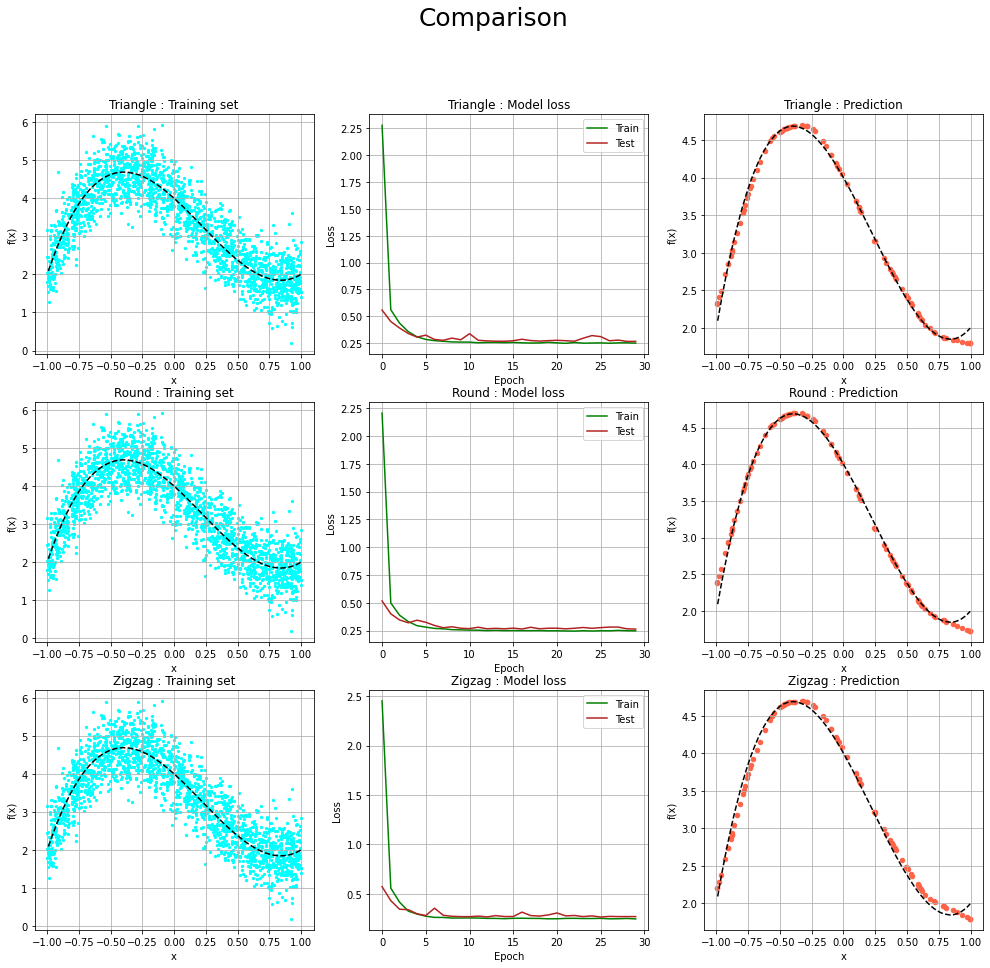

In [ ]:




print("TRANGLE:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = modelT.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = modelT.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")
print("ROUND:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = modelR.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = modelR.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")
print("ZIGZAG:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = modelZ.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = modelZ.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig = plt.figure (figsize = (17, 15))
plt.suptitle ("Comparison", fontsize=25)
x_predicted = np.random.uniform(-1, 1, 100)

#Triangle
plt.subplot (3, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Triangle : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 2)
plt.plot(historyT.history['loss'], color="green")
plt.plot(historyT.history['val_loss'], color="firebrick")
plt.title('Triangle : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 3)
y_predicted = modelT.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Triangle : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#Round
plt.subplot (3, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Round : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 5)
plt.plot(historyR.history['loss'], color="green")
plt.plot(historyR.history['val_loss'], color="firebrick")
plt.title('Round : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 6)
y_predicted = modelR.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Round : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#Zigzag
plt.subplot (3, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Zigzag : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 8)
plt.plot(historyZ.history['loss'], color="green")
plt.plot(historyZ.history['val_loss'], color="firebrick")
plt.title('Zigzag : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 9)
y_predicted = modelZ.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Zigzag : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")



plt.show()


All the three model seem to work well. There are not significant differences between the three.
Anyway, in the following studies I will use always the "zigzag" configuration.

#### 2. Activation function

The previous studies used **relu** as activation function. Here, I tried also the functions **softplus**, **selu**, **tanh**, **sigmoid** and **softmax**

In [ ]:

#1. Softplus
model1 = tf.keras.Sequential()
model1.add(Dense(200, input_shape=(1,), activation="softplus"))#
model1.add(Dense(50, activation="softplus"))#
model1.add(Dense(100, activation="softplus"))#
model1.add(Dense(50, activation="softplus"))#
model1.add(Dense(1, ))#activation="selu"
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

#2. selu
model2 = tf.keras.Sequential()
model2.add(Dense(200, input_shape=(1,), activation="selu"))#
model2.add(Dense(50, activation="selu"))#
model2.add(Dense(100, activation="selu"))#
model2.add(Dense(50, activation="selu"))#
model2.add(Dense(1, ))#activation="selu"
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()

#3. tanh
model3 = tf.keras.Sequential()
model3.add(Dense(200, input_shape=(1,), activation="tanh"))#
model3.add(Dense(50, activation="tanh"))#
model3.add(Dense(100, activation="tanh"))#
model3.add(Dense(50, activation="tanh"))#
model3.add(Dense(1, ))#activation="selu"
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()

#4. sigmoid
model4 = tf.keras.Sequential()
model4.add(Dense(200, input_shape=(1,), activation="sigmoid"))#
model4.add(Dense(50, activation="sigmoid"))#
model4.add(Dense(100, activation="sigmoid"))#
model4.add(Dense(50, activation="sigmoid"))#
model4.add(Dense(1, ))#activation="selu"
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.summary()

#5. softmax
model5 = tf.keras.Sequential()
model5.add(Dense(200, input_shape=(1,), activation="softmax"))#
model5.add(Dense(50, activation="softmax"))#
model5.add(Dense(100, activation="softmax"))#
model5.add(Dense(50, activation="softmax"))#
model5.add(Dense(1, ))#activation="selu"
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.summary()

#training
history1 = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history4 = model4.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history5 = model5.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_28 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 51        
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                

In [ ]:

print("softplus:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("selu:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("tanh:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("sigmoid:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model4.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("softmax:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model5.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model5.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

softplus:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.6830468773841858
Test accuracy: 0.6830468773841858
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.48330676555633545
Test accuracy: 0.48330676555633545
**************************************************************
selu:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2856198251247406
Test accuracy: 0.2856198251247406
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.02170509845018387
Test accuracy: 0.02170509845018387
**************************************************************
tanh:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.2709690034389496
Test accuracy: 0.2709690034389496
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.014426108449697495
Test accuracy: 0.014426108449697495
**************************************************************
sigmoid:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test

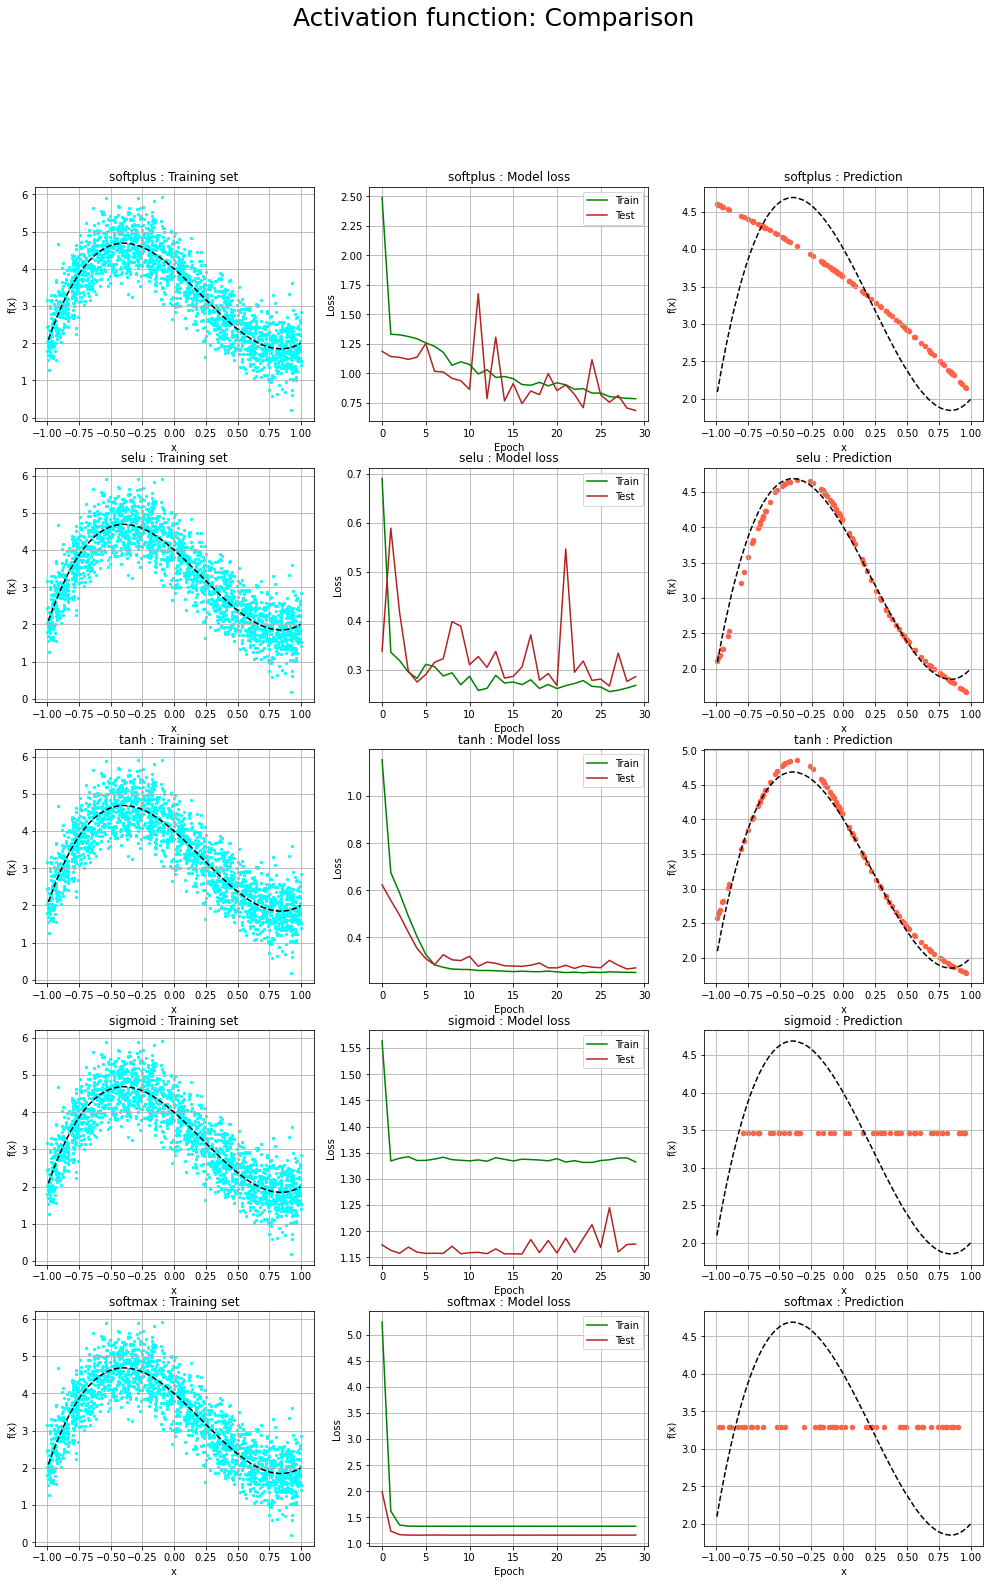

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)

fig = plt.figure (figsize = (17, 25))
plt.suptitle ("Activation function: Comparison", fontsize=25)

#softplus
plt.subplot (5, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("softplus : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (5, 3, 2)
plt.plot(history1.history['loss'], color="green")
plt.plot(history1.history['val_loss'], color="firebrick")
plt.title('softplus : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (5, 3, 3)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("softplus : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")


#selu
plt.subplot (5, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("selu : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (5, 3, 5)
plt.plot(history2.history['loss'], color="green")
plt.plot(history2.history['val_loss'], color="firebrick")
plt.title('selu : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (5, 3, 6)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("selu : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#tanh
plt.subplot (5, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("tanh : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (5, 3, 8)
plt.plot(history3.history['loss'], color="green")
plt.plot(history3.history['val_loss'], color="firebrick")
plt.title('tanh : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (5, 3, 9)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("tanh : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")


#sigmoid
plt.subplot (5, 3, 10)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("sigmoid : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (5, 3, 11)
plt.plot(history4.history['loss'], color="green")
plt.plot(history4.history['val_loss'], color="firebrick")
plt.title('sigmoid : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (5, 3, 12)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("sigmoid : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")


#softmax
plt.subplot (5, 3, 13)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("softmax : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (5, 3, 14)
plt.plot(history5.history['loss'], color="green")
plt.plot(history5.history['val_loss'], color="firebrick")
plt.title('softmax : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (5, 3, 15)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("softmax : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.show()

The graphs show that softmax, sigmoid and softplus are not suitable choices of activation functions for this architecture.

Selu and tanh make both good fits, but the test loss graph for selu is oscillating a lot: maybe this is a signal of overfitting.

#### 3. Optimizer

In the previous studies I used **SGD** (stocastic gradient descent) as optimizer. Here, I tried **Adagrad**, **Adadelta**, **Nadam**.

In [ ]:
#1. Adagrad
model1 = tf.keras.Sequential()
model1.add(Dense(200, input_shape=(1,), activation="relu"))#
model1.add(Dense(50, activation="relu"))#
model1.add(Dense(100, activation="relu"))#
model1.add(Dense(50, activation="relu"))#
model1.add(Dense(1, ))#activation="selu"
model1.compile(optimizer="Adagrad", loss='mse', metrics=['mse'])
model1.summary()

#2. Adadelta
model2 = tf.keras.Sequential()
model2.add(Dense(200, input_shape=(1,), activation="relu"))#
model2.add(Dense(50, activation="relu"))#
model2.add(Dense(100, activation="relu"))#
model2.add(Dense(50, activation="relu"))#
model2.add(Dense(1, ))#activation="selu"
model2.compile(optimizer="Adadelta", loss='mse', metrics=['mse'])
model2.summary()

#3. Nadam
model3 = tf.keras.Sequential()
model3.add(Dense(200, input_shape=(1,), activation="relu"))#
model3.add(Dense(50, activation="relu"))#
model3.add(Dense(100, activation="relu"))#
model3.add(Dense(50, activation="relu"))#
model3.add(Dense(1, ))#activation="selu"
model3.compile(optimizer="Nadam", loss='mse', metrics=['mse'])
model3.summary()

history1 = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_53 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_54 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_55 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 51        
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)              

In [ ]:

print("Adagrad:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("Adadelta:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("Nadam:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

Adagrad:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.3759292662143707
Test accuracy: 0.3759292662143707
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.14716918766498566
Test accuracy: 0.14716918766498566
**************************************************************
Adadelta:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 5.761742115020752
Test accuracy: 5.761742115020752
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 5.601343154907227
Test accuracy: 5.601343154907227
**************************************************************
Nadam:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.3022555708885193
Test accuracy: 0.3022555708885193
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.03549845889210701
Test accuracy: 0.03549845889210701
**************************************************************


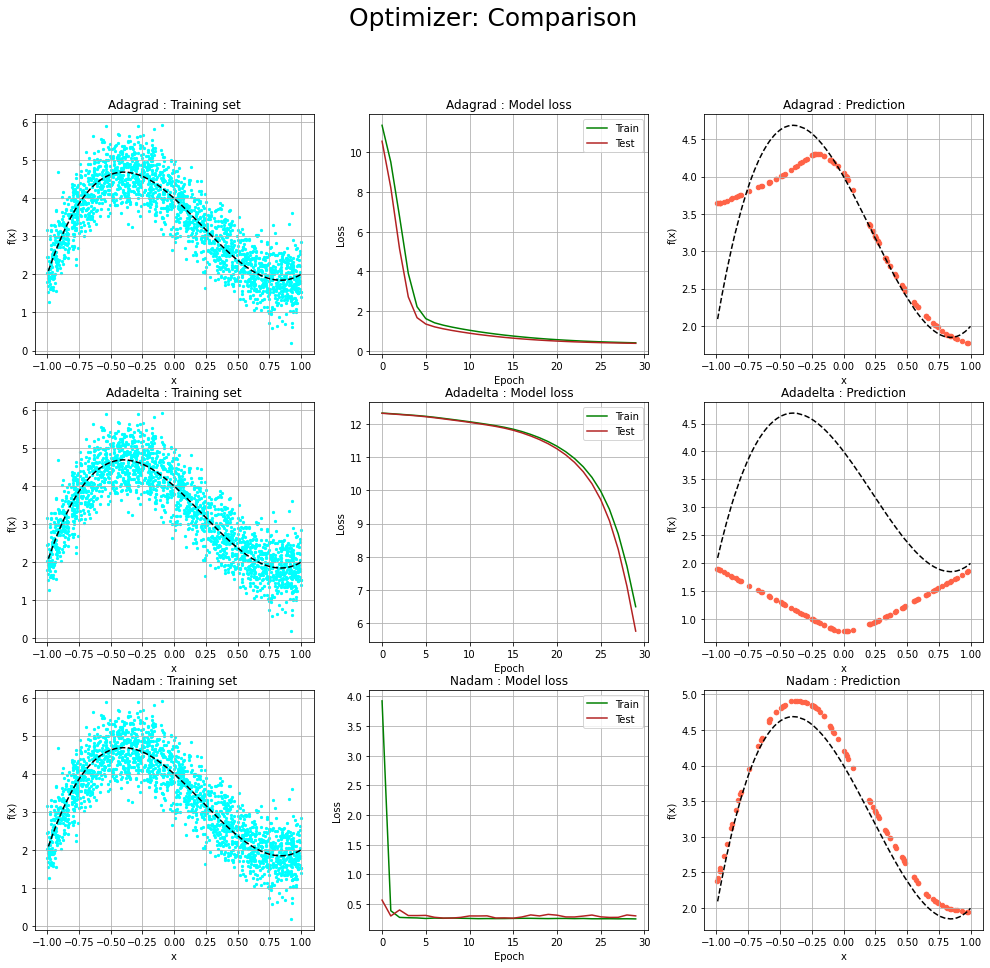

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)

fig = plt.figure (figsize = (17, 15))
plt.suptitle ("Optimizer: Comparison", fontsize=25)

#Adagrad
plt.subplot (3, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Adagrad : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 2)
plt.plot(history1.history['loss'], color="green")
plt.plot(history1.history['val_loss'], color="firebrick")
plt.title('Adagrad : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 3)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Adagrad : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")


#Adadelta
plt.subplot (3, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Adadelta : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 5)
plt.plot(history2.history['loss'], color="green")
plt.plot(history2.history['val_loss'], color="firebrick")
plt.title('Adadelta : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 6)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Adadelta : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#Nadam
plt.subplot (3, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Nadam : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 8)
plt.plot(history3.history['loss'], color="green")
plt.plot(history3.history['val_loss'], color="firebrick")
plt.title('Nadam : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 9)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Nadam : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.show()

The only optimizer which performs a good fit is Nadam. 

#### 3. Loss function

In the previous studies I used the **mean square error** as loss function. Here, I tried **mean absolute error**, **mean squared logarithmic error** and **logcosh**.

In [ ]:
#1. Mean Absolute Error
model1 = tf.keras.Sequential()
model1.add(Dense(200, input_shape=(1,), activation="relu"))#
model1.add(Dense(50, activation="relu"))#
model1.add(Dense(100, activation="relu"))#
model1.add(Dense(50, activation="relu"))#
model1.add(Dense(1, ))#activation="selu"
model1.compile(optimizer="SGD", loss='MAE', metrics=['mse'])
model1.summary()

#2. Mean Squared Logarithmic Error
model2 = tf.keras.Sequential()
model2.add(Dense(200, input_shape=(1,), activation="relu"))#
model2.add(Dense(50, activation="relu"))#
model2.add(Dense(100, activation="relu"))#
model2.add(Dense(50, activation="relu"))#
model2.add(Dense(1, ))#activation="selu"
model2.compile(optimizer="SGD", loss='MSLE', metrics=['mse'])
model2.summary()

#3. Logcosh
model3 = tf.keras.Sequential()
model3.add(Dense(200, input_shape=(1,), activation="relu"))#
model3.add(Dense(50, activation="relu"))#
model3.add(Dense(100, activation="relu"))#
model3.add(Dense(50, activation="relu"))#
model3.add(Dense(1, ))#activation="selu"
model3.compile(optimizer="SGD", loss='logcosh', metrics=['mse'])
model3.summary()

history1 = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_68 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_69 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_70 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 51        
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
Layer (type)              

In [ ]:
print("Mean Absolute Error:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("Mean Squared Logarithmic Error:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

print("Logcosh:")
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print ("**************************************************************")

Mean Absolute Error:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.42432883381843567
Test accuracy: 0.28101131319999695
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.12056053429841995
Test accuracy: 0.016875576227903366
**************************************************************
Mean Squared Logarithmic Error:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.02842080593109131
Test accuracy: 0.4951373040676117
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.013676664792001247
Test accuracy: 0.2826342284679413
**************************************************************
Logcosh:
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.128774493932724
Test accuracy: 0.28990763425827026
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.015361976809799671
Test accuracy: 0.031141871586441994
**************************************************************


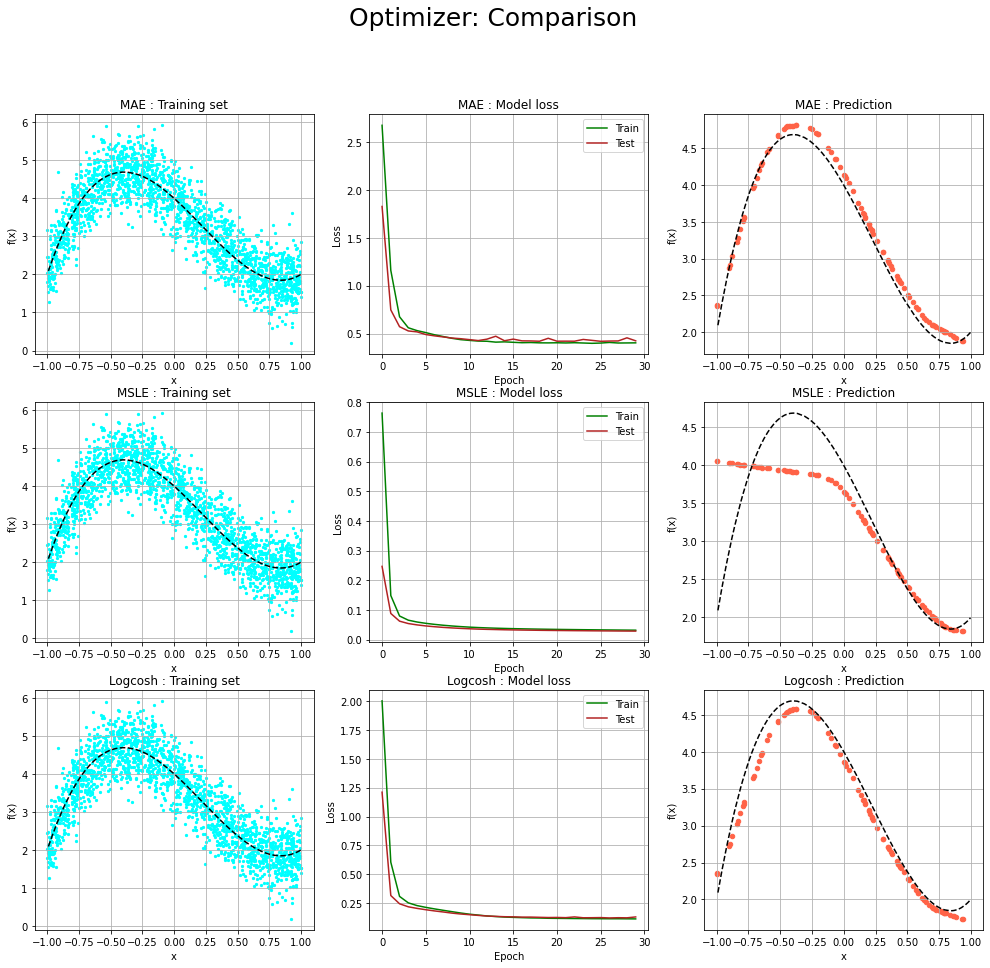

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)

fig = plt.figure (figsize = (17, 15))
plt.suptitle ("Optimizer: Comparison", fontsize=25)

#Mean Absolute Error
plt.subplot (3, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("MAE : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 2)
plt.plot(history1.history['loss'], color="green")
plt.plot(history1.history['val_loss'], color="firebrick")
plt.title('MAE : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 3)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("MAE : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")


#Mean Squared Logarithmic Error
plt.subplot (3, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("MSLE : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 5)
plt.plot(history2.history['loss'], color="green")
plt.plot(history2.history['val_loss'], color="firebrick")
plt.title('MSLE : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 6)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("MSLE : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#Logcosh
plt.subplot (3, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Logcosh : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 8)
plt.plot(history3.history['loss'], color="green")
plt.plot(history3.history['val_loss'], color="firebrick")
plt.title('Logcosh : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 9)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("Logcosh : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.show()

Both MAE and Logcosh are behaving well and they're very accurate in fitting the curve. These two functions, in fact, are quite similar to MSE, the gratest difference with it is that big errors are weigh less in the loss calculation.
MSLE instead is not a good choice for this model.

#### Outside the interval

So far, the best results were given by the *zigzag* configuration, with *relu* as activation function, *SGD* as optimiser, *MSE* as loss function (this is not so surprising: these are the parameters I built the NN architecture on, so it is not strange that they are the most suitable for that architecture).
Here I tried to study how this model behaves outside the $[-1, 1]$ interval in which it was trained.

In [ ]:
x_valid = np.random.uniform(-2, 2, 200)
x_valid.sort()
y_valid = np.random.normal(f(x_valid), sigma)
y_target = f(x_valid)
model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation="relu"))#
model.add(Dense(50, activation="relu"))#
model.add(Dense(100, activation="relu"))#
model.add(Dense(50, activation="relu"))#
model.add(Dense(1, ))#activation="selu"
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()


#training
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_108 (Dense)            (None, 50)                10050     
_________________________________________________________________
dense_109 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_110 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 51        
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 [==============================] - 1s 4ms/step - loss: 2.1481 - mse: 2.1481 - val_loss: 66.7004 - 

PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 46.324851989746094
Test accuracy: 46.324851989746094
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 45.84242248535156
Test accuracy: 45.84242248535156


Text(0, 0.5, 'f(x)')

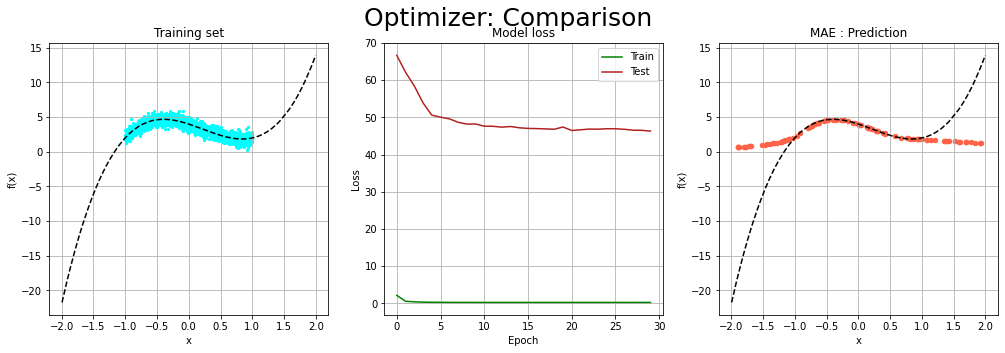

In [ ]:
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_predicted = np.random.uniform(-2, 2, 100)

fig = plt.figure (figsize = (17, 5))
plt.suptitle ("Optimizer: Comparison", fontsize=25)

plt.subplot (1, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (1, 3, 2)
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="firebrick")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (1, 3, 3)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("MAE : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")


From the graphs it's very visible that, out of the range in which it was trained, the model is unable to fit the line.